In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm.auto import tqdm


In [9]:
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def rosenbrock_grad(params):
    x, y = params[0], params[1]
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return torch.tensor([dx, dy])

In [10]:
def gradient_descent(learning_rate, max_iter, initial_params, epsilon=1e-4):
  # inicialização
  params = initial_params.clone().detach()
  loss_history = []
  hyperparams_history = [params.detach().clone()]

  for i in tqdm(range(max_iter)):
    # forward
    loss = rosenbrock(params[0], params[1])
    loss_history.append(loss.detach().item())

    # backward
    gradient = rosenbrock_grad(params)

    params -= learning_rate * gradient

    hyperparams_history.append(params.detach().clone())

    if torch.norm(gradient) < epsilon:
      print(f"convergiu após {i + 1} iterações com learning rate: {learning_rate}")
      print(f"Ponto final: {params[0]}, {params[1]} \n Erro: {loss}")
      break
  return torch.stack(hyperparams_history), loss_history, i + 1



In [47]:
def stochastic_gradient_descent(learning_rate, max_iter, initial_params, dp=5.0, epsilon=1e-4):
  params = initial_params.clone().detach()
  params_history = [params.detach().clone()]
  for epoch in tqdm(range(max_iter)):

    gradient = rosenbrock_grad(params)
    noise = torch.normal(mean=0.0, std=dp, size=gradient.shape)
    gradient += noise

    params -= learning_rate * gradient
    params_history.append(params.detach().clone())

    # print(f"loss: {torch.norm(gradient)}")
    if (torch.norm(gradient) < epsilon):
      print(f"convergiu após {epoch + 1} iterações com learning rate de {learning_rate}")
      print(f"Ponto final: {params[0]}, {params[1]}")
    
  return torch.stack(params_history), epoch + 1

In [12]:
def adam_gradient_descent(learning_rate, max_iter, initial_params, beta1=0.9, beta2=0.999, epsilon=1e-8):
  params = initial_params
  params_history = [params.detach().clone()]
  mt = torch.zeros_like(params)
  vt = torch.zeros_like(params)

  for epoch in tqdm(range(max_iter)):
    gradient = rosenbrock_grad(params)

    mt = beta1 * mt + (1 - beta1) * gradient
    vt = beta2 * vt + (1 - beta2) * (gradient * gradient)
    mt_hat = mt / (1 - beta1**(epoch + 1))
    vt_hat = vt / (1 - beta2**(epoch + 1))

    params -= mt_hat * learning_rate / (torch.sqrt(vt_hat) + epsilon)
    params_history.append(params)

  return params_history, params, epoch + 1

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

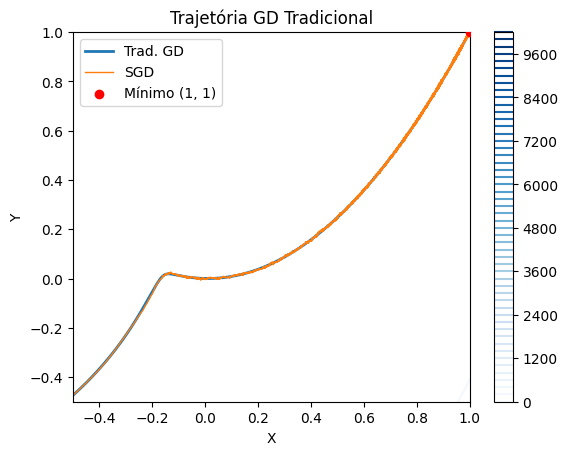

In [ ]:
learning_rate = np.arange(start=1e-4, stop=1e-3, step=1e-4)
best_learning_rate_gd = 0.0001
best_learning_rate_sgd = 0.0001
best_learning_rate_adamgd = 0.0003
max_iter = 100000
epsilon = 1e-3
initial_params = torch.Tensor([-1.5, -1.0])
loss_history = None

# for lr in learning_rate:
#   print(f"Learning rate: {lr}")
#   print(f"Last param: {param_history[-1]}")
  
#   param_history, num_iters = stochastic_gradient_descent(learning_rate=lr, max_iter=max_iter, initial_params=initial_params, dp=5.0, epsilon=epsilon)
#   plt.plot(param_history.numpy()[:, 0], param_history.numpy()[:, 1], linestyle='-', markersize=4, linewidth=1)

gd_param_history, gd_loss_history, gd_num_iters = gradient_descent(learning_rate=best_learning_rate_gd, max_iter=max_iter, initial_params=initial_params, epsilon=epsilon)
plt.plot(gd_param_history.numpy()[:, 0], gd_param_history.numpy()[:, 1], linestyle='-', label="Trad. GD", markersize=4, linewidth=2)

sgd_param_history, sgd_num_iters = stochastic_gradient_descent(learning_rate=best_learning_rate_sgd, max_iter=max_iter, initial_params=initial_params, dp=5.0, epsilon=epsilon)
plt.plot(sgd_param_history.numpy()[:, 0], sgd_param_history.numpy()[:, 1], linestyle='-', label="SGD", markersize=4, linewidth=1)


x_lim = [-1, 3]
y_lim = [-1, 3]

x_values = np.linspace(x_lim[0], x_lim[1], 100)
y_values = np.linspace(y_lim[0], y_lim[1], 100)

x, y = np.meshgrid(x_values, y_values)

z = rosenbrock(x, y)
plt.contour(x, y, z, levels=50, cmap='Blues')
plt.colorbar()

plt.scatter([1.0], [1.0], color='red', zorder=5, label='Mínimo (1, 1)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Trajetória GD Tradicional')
plt.legend()

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()
